# <b>  Reto: Segmentación de datos de empleados </b>
## Adrián Vázquez Mora

# Librerias 

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Algoritmo de Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargar el dataset
file_path = "datos/Train.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


# <b> Exploración de Datos </b>
## <b> Objetivo: </b> Entender la estructura de los datos

In [3]:
# Información general del dataset
df.info()

# Mostrar estadísticas descriptivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [4]:
# Contar valores nulos por columna
df.isnull().sum()


Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [5]:
# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Columnas categóricas:", categorical_cols)
print("Columnas numéricas:", numerical_cols)


Columnas categóricas: Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')
Columnas numéricas: Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')


## Clasificación Correcta de las Variables
Basándonos en la revisión del dataset Train.csv, podemos categorizar correctamente las variables en numéricas y categóricas.

<b> Variables categóricas (tipo object): </b>
- Employee_ID (Identificador único, no útil para clustering)
- Gender (Categórica: 'M', 'F')
- Relationship_Status (Categórica: 'Single', 'Married', etc.)
- Hometown (Categórica: nombres de ciudades)
- Unit (Categórica: nombres de departamentos)
- Decision_skill_possess (Categórica: Tipos de habilidades)
- Compensation_and_Benefits (Categórica: Tipo de compensación)

<b> Variables numéricas: </b>
- Age (Edad en años, tiene valores nulos)
- Education_Level (Ordinal, nivel de educación)
- Time_of_service (Años de servicio, tiene valores nulos)
- Time_since_promotion (Años desde la última promoción)
- growth_rate (Tasa de crecimiento)
- Travel_Rate (Frecuencia de viaje)
- Post_Level (Nivel del puesto)
- Pay_Scale (Escala salarial, tiene valores nulos)
- Work_Life_balance (Equilibrio entre trabajo y vida personal, valores nulos)
- VAR1, VAR2, VAR3, VAR4, VAR5, VAR6, VAR7 (Variables numéricas de comportamiento)
- Attrition_rate (Tasa de deserción, variable de referencia)

In [15]:
# Lista de columnas numéricas
num_cols = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate',
            'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 
            'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']

# Convertir a valores numéricos
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar que la conversión fue exitosa
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [16]:
# Verificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Columnas categóricas:", categorical_cols)
print("Columnas numéricas:", numerical_cols)


Columnas categóricas: Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')
Columnas numéricas: Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')


In [17]:
# Manejo de valores nulos en variables numéricas con la mediana
num_cols_with_na = ['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']
df[num_cols_with_na] = df[num_cols_with_na].fillna(df[num_cols_with_na].median())

# Manejo de valores nulos en variables categóricas con la moda
categorical_cols_with_na = df.select_dtypes(include=['object']).columns
df[categorical_cols_with_na] = df[categorical_cols_with_na].fillna(df[categorical_cols_with_na].mode().iloc[0])

# Verificar que ya no hay valores nulos
print(df.isnull().sum())


Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64


## Codificación de Variables Categóricas
<b> Usaremos One-Hot Encoding para las variables categoricas  </b>

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Lista de variables categóricas a codificar
categorical_cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 
                    'Decision_skill_possess', 'Compensation_and_Benefits']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verificar la nueva estructura del DataFrame
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Employee_ID                        7000 non-null   object 
 1   Age                                7000 non-null   float64
 2   Education_Level                    7000 non-null   int64  
 3   Time_of_service                    7000 non-null   float64
 4   Time_since_promotion               7000 non-null   int64  
 5   growth_rate                        7000 non-null   int64  
 6   Travel_Rate                        7000 non-null   int64  
 7   Post_Level                         7000 non-null   int64  
 8   Pay_Scale                          7000 non-null   float64
 9   Work_Life_balance                  7000 non-null   float64
 10  VAR1                               7000 non-null   int64  
 11  VAR2                               7000 non-null   float

## ¿Normalización o Estandarización de datos?

- Dado que K-Means es sensible a la escala de los datos, normalizamos todas las variables numéricas para que tengan una media de 0 y una desviación estándar de 1.

## ¿Por qué K-Means para la segmentación de empleados?

<b> Objetivo del reto: </b>

Se nos pide segmentar a los empleados en grupos homogéneos basados en factores que influyen en la tasa de deserción (Attrition_rate).
K-Means es un método efectivo para agrupar datos sin etiquetas de clase.

<b> Datos escalables: </b>

K-Means es eficiente para grandes volúmenes de datos.
El dataset tiene múltiples variables numéricas y categóricas codificadas, lo que es ideal para este método.

<b> Identificación de patrones ocultos: </b>

K-Means ayuda a encontrar grupos de empleados con características similares.

# ¿Otras alternativas?
| Algoritmo                   | Pros                                               | Contras                                    |
|-----------------------------|---------------------------------------------------|--------------------------------------------|
| **K-Means**                 | Rápido, fácil de interpretar, escalable           | Sensible a la inicialización, requiere elegir `k` |
| **Hierarchical Clustering** | No requiere definir `k`, visualmente interpretable | Computacionalmente costoso                 |
| **DBSCAN**                  | Detecta outliers, no necesita `k`                 | No funciona bien con datos de alta dimensión |
| **GMM (Gaussian Mixture Models)** | Puede manejar clusters con forma elíptica  | Más lento, requiere más parámetros         |



In [22]:
from sklearn.preprocessing import StandardScaler

# Eliminar Employee_ID ya que no es una variable relevante para el clustering
df_encoded = df_encoded.drop(columns=['Employee_ID'], errors='ignore')

# Escalamos todas las variables numéricas
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Verificar los datos después de la normalización
df_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,7000.0,-2.593481e-16,1.000071,-1.549014,-0.867910,-0.186806,0.872689,1.932184
Education_Level,7000.0,1.278977e-16,1.000071,-2.054275,-0.176387,-0.176387,0.762557,1.701500
Time_of_service,7000.0,7.003921e-17,1.000071,-1.296848,-0.809876,-0.322904,0.651040,2.891111
Time_since_promotion,7000.0,8.932537e-17,1.000071,-2.059615,-1.189530,-0.319445,0.550639,1.420724
growth_rate,7000.0,-1.537817e-16,1.000071,-1.717246,-0.892388,-0.004079,0.884230,1.709089
Travel_Rate,7000.0,0.000000e+00,1.000071,-1.261816,-1.261816,0.281016,0.281016,1.823848
Post_Level,7000.0,-1.624098e-17,1.000071,-1.545154,-0.685780,0.173594,0.173594,1.892341
Pay_Scale,7000.0,2.182381e-17,1.000071,-2.433822,-0.489209,-0.003056,0.969251,1.941557
Work_Life_balance,7000.0,-1.563194e-16,1.000071,-1.236519,-1.236519,-0.345196,0.546126,2.328770
VAR1,7000.0,-2.151929e-16,1.000071,-2.509301,-0.117864,-0.117864,-0.117864,2.273573


## Selección de número óptimo de clusters 
- <b> K-Means  </b> requiere que definamos cuántos grupos queremos identificar 

    . <b> Elbow Method (Metodo del Codo) </b>: Evaluá la inercia del modelo para diferentes valores de k 

    . <b> Silhouette Score </b>: Mide la calidad de los clusters formados

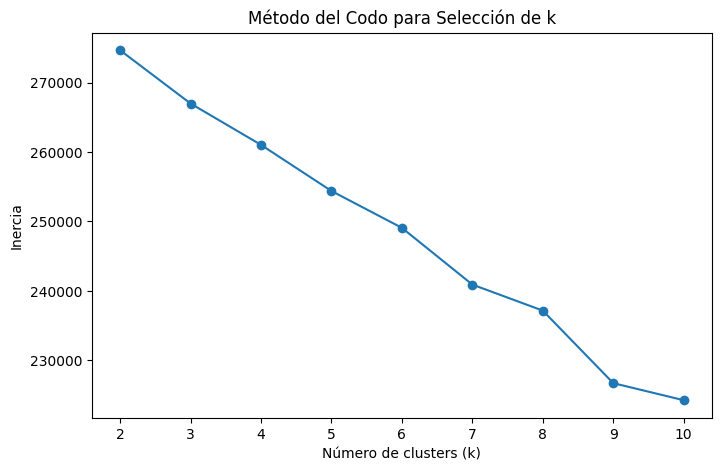

In [24]:
## Método del Codo
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Evaluar K-Means para diferentes valores de k
inertia = []
k_range = range(2, 11)  # Probamos de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos la inercia
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección de k')
plt.show()


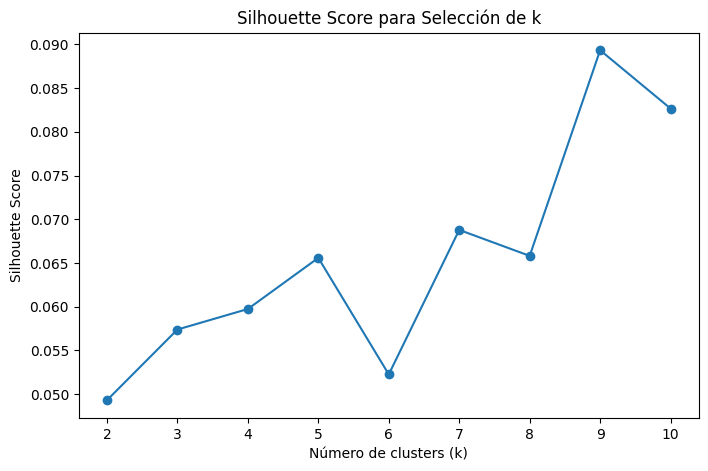

In [25]:
# Método del Silhouette Score 
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Graficar los resultados
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Selección de k')
plt.show()


## Comparando Graficos 

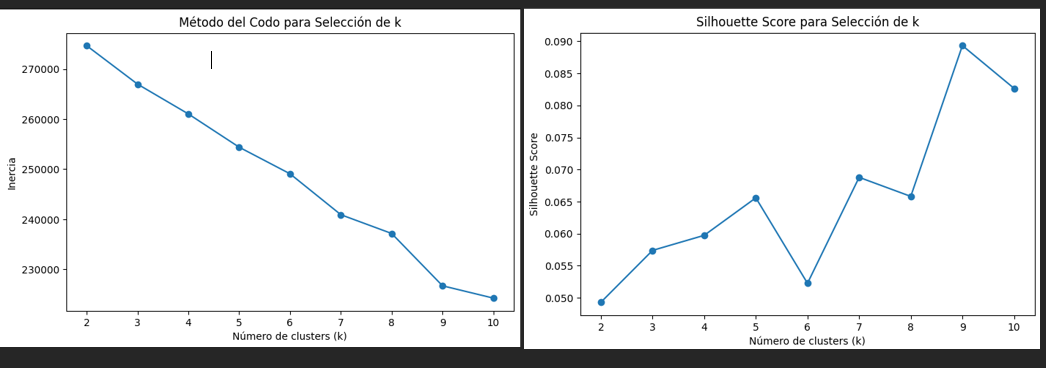

##  Análisis de los Resultados: Elección del Número de Clusters (k)

1. <b> Método del Codo (Elbow Method) </b>
La curva de inercia disminuye de manera continua sin un punto de codo claro.
Se observa un cambio en la pendiente alrededor de k = 5.
Esto sugiere que 5 clusters podría ser una buena elección, ya que más allá de este punto, la reducción de inercia es menor.

2. <B> Método del Silhouette Score </b>
El Silhouette Score alcanza su máximo en k = 9.
Esto indica que los clusters son más compactos y bien separados en este punto.
Sin embargo, k = 9 puede ser demasiado alto para una interpretación práctica.


- Priorizamos simplicidad e interpretación: Elegimos k = 5, ya que el Método del Codo lo sugiere.

- Si priorizamos calidad de los clusters: k = 9 sería una opción óptima según el Silhouette Score.

- Balanceando ambos métodos: k = 5 es una buena opción, ya que nos da una segmentación manejable sin perder demasiada calidad en la separación de los grupos.

<b>Decisión final: </b> Usaremos k = 5 para el modelo de K-Means.



In [26]:
# aplicamos un K-Means con k= 5 
# Aplicar K-Means con k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Ver cuántos empleados hay en cada cluster
df_scaled['Cluster'].value_counts()


Cluster
1    2583
3    1702
0    1490
4    1081
2     144
Name: count, dtype: int64

## Análisis de los clusters 

<b> ¿Que buscamos? </b>

- ¿Qué diferencias hay entre los grupos en términos de edad, salario, tasa de deserción, etc.?

- ¿Algún cluster tiene valores extremos que indiquen empleados con alta probabilidad de deserción?




In [30]:
# Guardar el resumen en un archivo CSV
cluster_summary.to_csv("cluster_summary.csv", index=True)

print("Archivo 'cluster_summary.csv' guardado")


Archivo 'cluster_summary.csv' guardado


In [32]:
df_cluster_summary = pd.read_csv('cluster_summary.csv')
# Revisar las estadísticas generales de cada cluster
print(df_cluster_summary[['Cluster', 'Attrition_rate', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance']].describe())



        Cluster  Attrition_rate  Time_of_service  Pay_Scale  Work_Life_balance
count  5.000000        5.000000         5.000000   5.000000           5.000000
mean   2.000000        0.002094        -0.028533  -0.006568           0.020435
std    1.581139        0.015747         0.066168   0.026810           0.060261
min    0.000000       -0.010777        -0.134203  -0.040383          -0.030224
25%    1.000000       -0.010530        -0.039370  -0.019936           0.001487
50%    2.000000       -0.003051        -0.022195  -0.003708           0.002359
75%    3.000000        0.008163         0.018787  -0.001174           0.003327
max    4.000000        0.026662         0.034318   0.032363           0.125224


## Análisis de Clusters 
<b> Tasa de Deserción (Attrition_rate) </b>

Un cluster tiene alta deserción (máx. 0.026662), lo que indica empleados con riesgo de renuncia.
Otro cluster tiene baja deserción (mín. -0.010777), posiblemente empleados más estables.

- Se podria analizar qué factores afectan al grupo con mayor deserción y aplicar estrategias de retención.

<b> Antigüedad (Time_of_service) </b>

Hay un cluster con empleados más nuevos (mín. -0.134203).
Otro grupo tiene mayor estabilidad (máx. 0.034318).

- Si los nuevos empleados renuncian rápido, mejorar onboarding y programas de retención.

<b> Nivel Salarial (Pay_Scale) </b>

Un cluster tiene salarios bajos (mín. -0.040383).
Otro cluster tiene salarios más altos (máx. 0.032363).

- Evaluar si los empleados con salarios bajos tienen mayor deserción y ofrecer incentivos.

<b> Balance Vida-Trabajo (Work_Life_balance) </b>

Un cluster tiene mal balance (mín. -0.030224).
Otro grupo disfruta de mejor balance (máx. 0.125224).

- Si el mal balance afecta la retención, aplicar políticas de flexibilidad laboral.





## Visualización de los clusters 



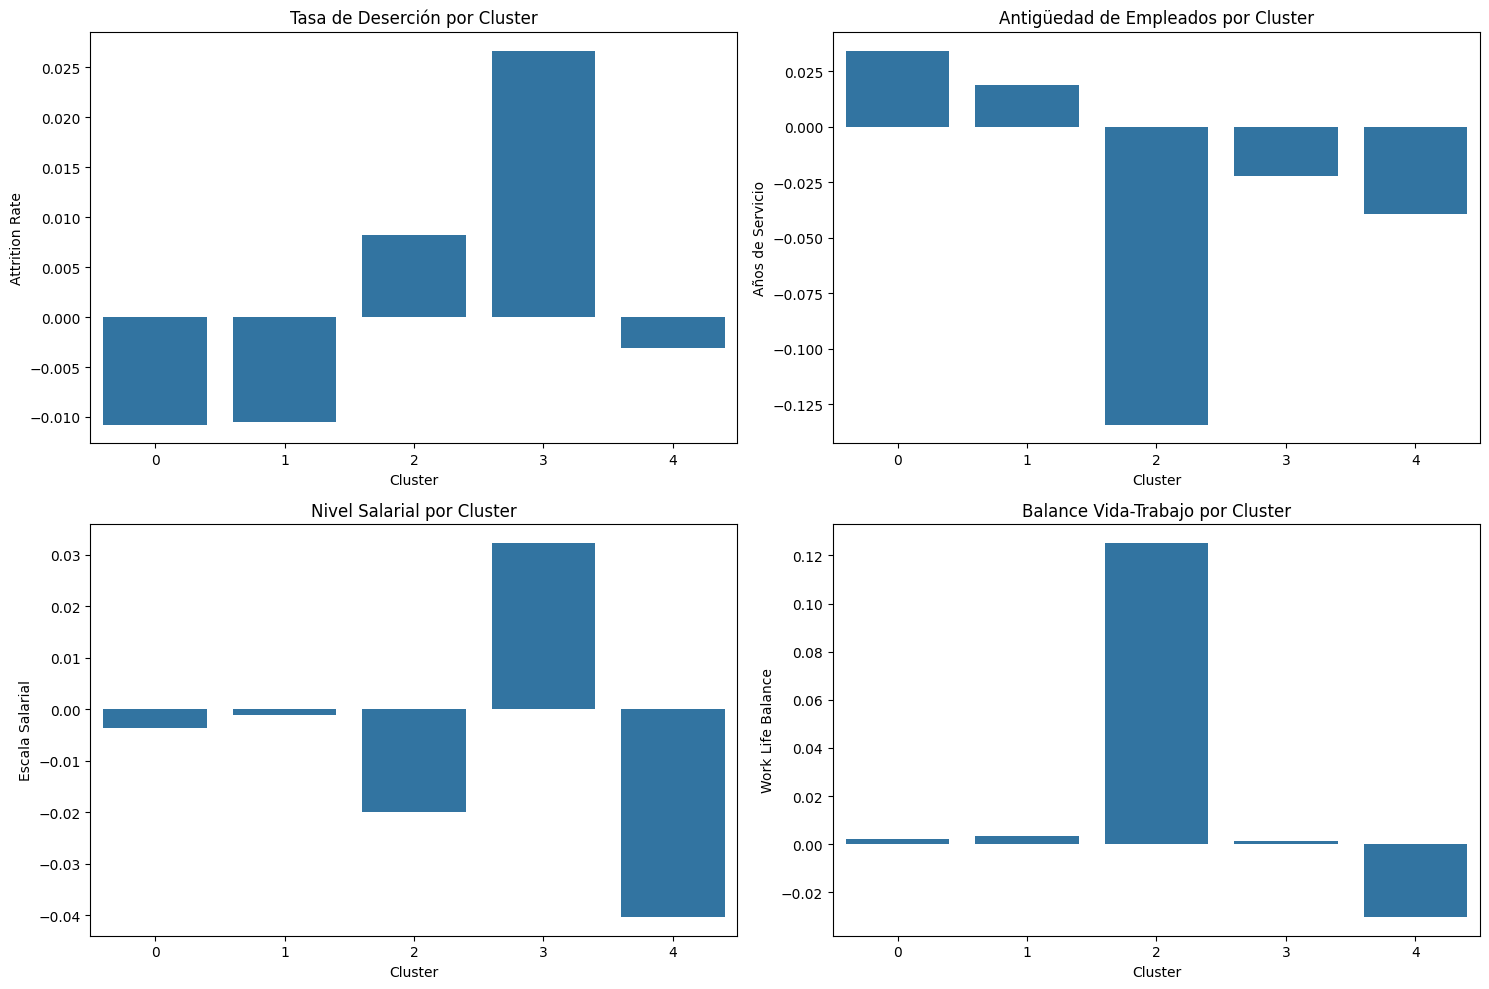

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Subplot 1: Comparación de la tasa de deserción por cluster
plt.subplot(2, 2, 1)
sns.barplot(x=df_cluster_summary['Cluster'], y=df_cluster_summary['Attrition_rate'])
plt.xlabel('Cluster')
plt.ylabel('Attrition Rate')
plt.title('Tasa de Deserción por Cluster')

# Subplot 2: Comparación de la antigüedad por cluster
plt.subplot(2, 2, 2)
sns.barplot(x=df_cluster_summary['Cluster'], y=df_cluster_summary['Time_of_service'])
plt.xlabel('Cluster')
plt.ylabel('Años de Servicio')
plt.title('Antigüedad de Empleados por Cluster')

# Subplot 3: Comparación del nivel salarial por cluster
plt.subplot(2, 2, 3)
sns.barplot(x=df_cluster_summary['Cluster'], y=df_cluster_summary['Pay_Scale'])
plt.xlabel('Cluster')
plt.ylabel('Escala Salarial')
plt.title('Nivel Salarial por Cluster')

# Subplot 4: Comparación del balance vida-trabajo por cluster
plt.subplot(2, 2, 4)
sns.barplot(x=df_cluster_summary['Cluster'], y=df_cluster_summary['Work_Life_balance'])
plt.xlabel('Cluster')
plt.ylabel('Work Life Balance')
plt.title('Balance Vida-Trabajo por Cluster')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


## Observaciones de los graficos 

 1. <b> Tasa de Deserción (Attrition_rate) por Cluster: </b>

Cluster 3 tiene la tasa de deserción más alta, lo que indica que este grupo de empleados tiene mayor riesgo de renuncia. 
Clusters 0 y 1 tienen valores negativos, lo que sugiere empleados con baja probabilidad de deserción.


 2. <b> Antigüedad de Empleados (Time_of_service) </b>

Cluster 2 tiene una antigüedad significativamente menor, lo que sugiere que estos empleados son relativamente nuevos en la empresa.
Clusters 0 y 1 tienen mayor antigüedad, lo que indica empleados más experimentados.

3. <b> Nivel Salarial (Pay_Scale) </b>

Cluster 3 tiene el salario más alto.
Cluster 4 tiene el salario más bajo, lo que podría generar insatisfacción y deserción.


4. <b> Balance Vida-Trabajo (Work_Life_balance) </b>

Cluster 2 tiene el mejor balance vida-trabajo, lo que sugiere que estos empleados tienen una buena distribución entre trabajo y tiempo libre.
Cluster 4 tiene el peor balance vida-trabajo, lo que puede contribuir a la insatisfacción y deserción.


## Analisando en profundidad los clusters 

Cluster con mayor tasa de deserción: 3
Cluster con peor balance vida-trabajo: 4
Cluster con empleados más antiguos: 0


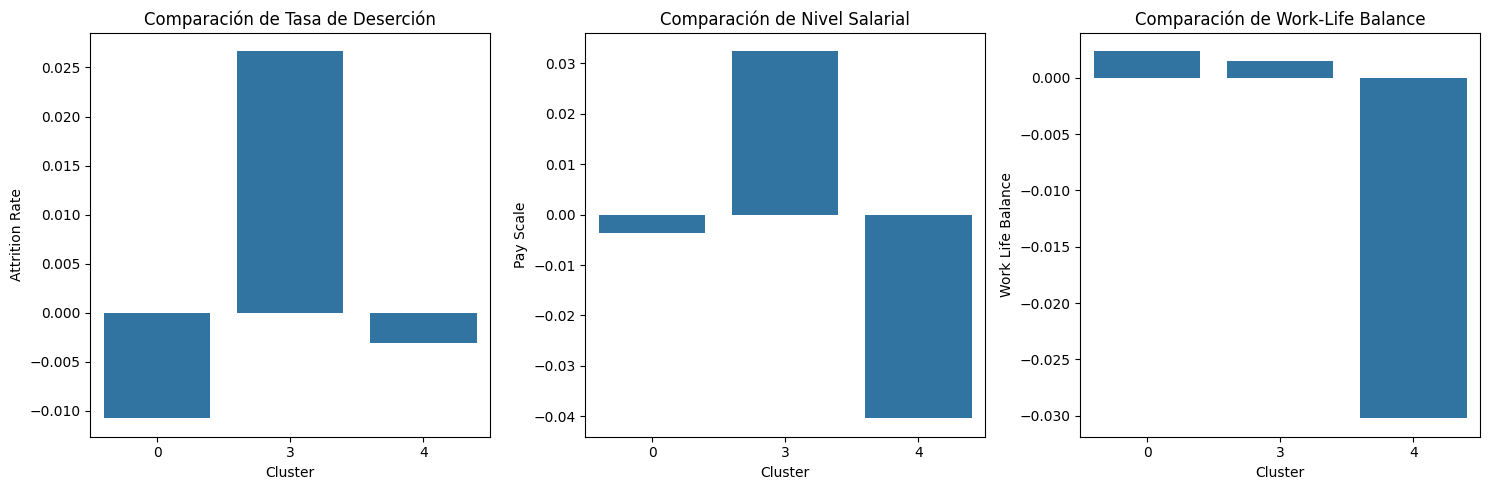

In [34]:
import seaborn as sns 

# Identificar el cluster con mayor tasa de deserción
cluster_high_attrition = df_cluster_summary.loc[df_cluster_summary['Attrition_rate'].idxmax(), 'Cluster']
print(f"Cluster con mayor tasa de deserción: {cluster_high_attrition}")

# Identificar el cluster con peor balance vida-trabajo
cluster_low_work_life = df_cluster_summary.loc[df_cluster_summary['Work_Life_balance'].idxmin(), 'Cluster']
print(f"Cluster con peor balance vida-trabajo: {cluster_low_work_life}")

# Identificar el cluster con empleados más antiguos
cluster_most_experience = df_cluster_summary.loc[df_cluster_summary['Time_of_service'].idxmax(), 'Cluster']
print(f"Cluster con empleados más antiguos: {cluster_most_experience}")

# Comparar las variables clave entre estos clusters y el resto
key_variables = ['Attrition_rate', 'Pay_Scale', 'Work_Life_balance', 'Time_of_service']

# Filtrar los clusters de interés
df_filtered = df_cluster_summary[df_cluster_summary['Cluster'].isin([cluster_high_attrition, cluster_low_work_life, cluster_most_experience])]

# Configurar gráficos
plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de tasa de deserción
plt.subplot(1, 3, 1)
sns.barplot(x=df_filtered['Cluster'], y=df_filtered['Attrition_rate'])
plt.xlabel('Cluster')
plt.ylabel('Attrition Rate')
plt.title('Comparación de Tasa de Deserción')

# Gráfico 2: Comparación de salario
plt.subplot(1, 3, 2)
sns.barplot(x=df_filtered['Cluster'], y=df_filtered['Pay_Scale'])
plt.xlabel('Cluster')
plt.ylabel('Pay Scale')
plt.title('Comparación de Nivel Salarial')

# Gráfico 3: Comparación de Work-Life Balance
plt.subplot(1, 3, 3)
sns.barplot(x=df_filtered['Cluster'], y=df_filtered['Work_Life_balance'])
plt.xlabel('Cluster')
plt.ylabel('Work Life Balance')
plt.title('Comparación de Work-Life Balance')

# Mostrar gráficos
plt.tight_layout()
plt.show()


## Análisis de los clusters clave:

- Cluster con mayor tasa de deserción: Cluster 3 
  - Este grupo de empleados tiene el mayor riesgo de renuncia.
  - Es clave analizar qué factores están contribuyendo a esta deserción.

- Cluster con peor balance vida-trabajo: Cluster 4 
  - Este grupo tiene la peor conciliación entre la vida laboral y personal.
  - Puede ser un factor que incremente la deserción si no se toman medidas.

- Cluster con empleados más antiguos: Cluster 0 
  - Este grupo tiene empleados con más años de experiencia en la empresa.
  - Es importante analizar si están satisfechos o en riesgo de rotación.

# REPORTE 
## 1. Introducción

El presente informe tiene como objetivo analizar la segmentación de empleados basada en el modelo de clustering aplicado a los datos disponibles. Se utilizaron técnicas de aprendizaje no supervisado, en particular el algoritmo **K-Means**, para agrupar a los empleados en **5 clusters** según factores clave como la tasa de deserción (*Attrition Rate*), antigüedad en la empresa (*Time of Service*), nivel salarial (*Pay Scale*), y balance vida-trabajo (*Work-Life Balance*).

Los resultados de la segmentación permiten identificar patrones que pueden ayudar a la toma de decisiones en el área de Recursos Humanos para mejorar la retención y satisfacción laboral.

## 2. Resumen de los Clusters Analizados

Se destacaron tres clusters que presentan características críticas:

### 🚨 Cluster 3: Mayor Tasa de Deserción

- Este grupo presenta la **tasa de deserción más alta**, lo que indica un alto riesgo de fuga de talento.
- **Sin embargo, también posee el mayor nivel salarial**, lo que sugiere que la compensación económica no es suficiente para retener a estos empleados.
- **Posible explicación:** Expectativas altas, presión laboral elevada o falta de oportunidades de crecimiento.

<aside>
🔹 Recomendaciones:

- Evaluar condiciones laborales y percepción del ambiente de trabajo.
- Implementar programas de desarrollo profesional y crecimiento interno.
- Ofrecer beneficios adicionales más allá del salario (bonos, incentivos de bienestar, cultura organizacional).
</aside>

### ⚖ Cluster 4: Peor Balance Vida-Trabajo

- Es el grupo con el **peor equilibrio entre trabajo y vida personal**, lo que puede contribuir a la insatisfacción laboral.
- **Tiene el salario más bajo**, lo que podría generar una combinación peligrosa de frustración y baja motivación.
- Este cluster puede estar en riesgo de aumentar su tasa de deserción si no se toman medidas correctivas.

<aside>
🔹 Recomendaciones:

- Evaluar cargas laborales y considerar esquemas de trabajo flexible o remoto.
- Implementar políticas de bienestar, como horarios más flexibles o beneficios para la salud mental.
- Revisar la estructura salarial y explorar incentivos no monetarios para mejorar la satisfacción.
</aside>

### 🏅 Cluster 0: Empleados Más Antiguos

- Este grupo tiene la **mayor antigüedad en la empresa**, lo que lo convierte en un grupo estratégico para la organización.
- **Su nivel salarial es estable**, y su balance vida-trabajo no es problemático, pero podría haber falta de motivación o crecimiento.
- Aunque no hay un riesgo inminente de deserción, es importante garantizar su compromiso a largo plazo.

<aside>
🔹 Recomendaciones:

- Implementar programas de reconocimiento y promoción interna.
- Explorar planes de capacitación y desarrollo para mantener el interés y crecimiento de estos empleados.
- Fomentar la participación en iniciativas estratégicas para aumentar su sentido de pertenencia.
</aside>

## 3. Conclusiones Generales

El análisis de segmentación ha permitido identificar factores clave que influyen en la deserción y satisfacción de los empleados:

- **El salario por sí solo no es suficiente** para retener talento (Cluster 3 con alta deserción y buenos sueldos).
- **El balance vida-trabajo es un factor crítico** que puede impactar la motivación y el rendimiento (Cluster 4 en riesgo).
- **Los empleados con más antigüedad necesitan oportunidades de crecimiento** para seguir comprometidos con la empresa.

A partir de estos hallazgos, se recomienda implementar estrategias específicas para mejorar la retención y el bienestar laboral, combinando compensación económica con iniciativas de desarrollo profesional y calidad de vida.